LSTM FOR FORECASTING TB CASES AT KIDH

INSTALL NECESSARY LIBRARY

In [ ]:
pip install --ignore-installed qiskit-terra qiskit-aer

In [ ]:
pip install numpy==1.19.5

In [ ]:
pip install -U scikit-learn

DATASET UPLOAD TO COLAB

IMPORT NECCESSARY LIBRARY

In [ ]:
#upload the dataset into google colab
from google.colab import files
uploaded = files.upload()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':100})
plt.style.use('fivethirtyeight')
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
#plt.rcParams['text.color'] = 'G'

READ THE DATASET

In [167]:
#df = pd.read_csv('tbcaseskibongoto.csv')
df= pd.read_csv('tbcasesDar.csv')

In [168]:
df

,date,tbcases
0,01/01/17,1030
1,01/02/17,970
2,01/03/17,1285
3,01/04/17,1029
4,01/01/17,1158
5,01/06/17,1066
6,01/07/17,978
7,01/08/17,1214
8,01/09/17,1183
9,01/10/17,1055


DATA PREPROSSING

In [ ]:
#df['Date']= pd.to_datetime(df['date'],format="%d/%m/%y")
#df.drop(columns=['date'], inplace=True)

In [169]:
series=df.set_index('date')

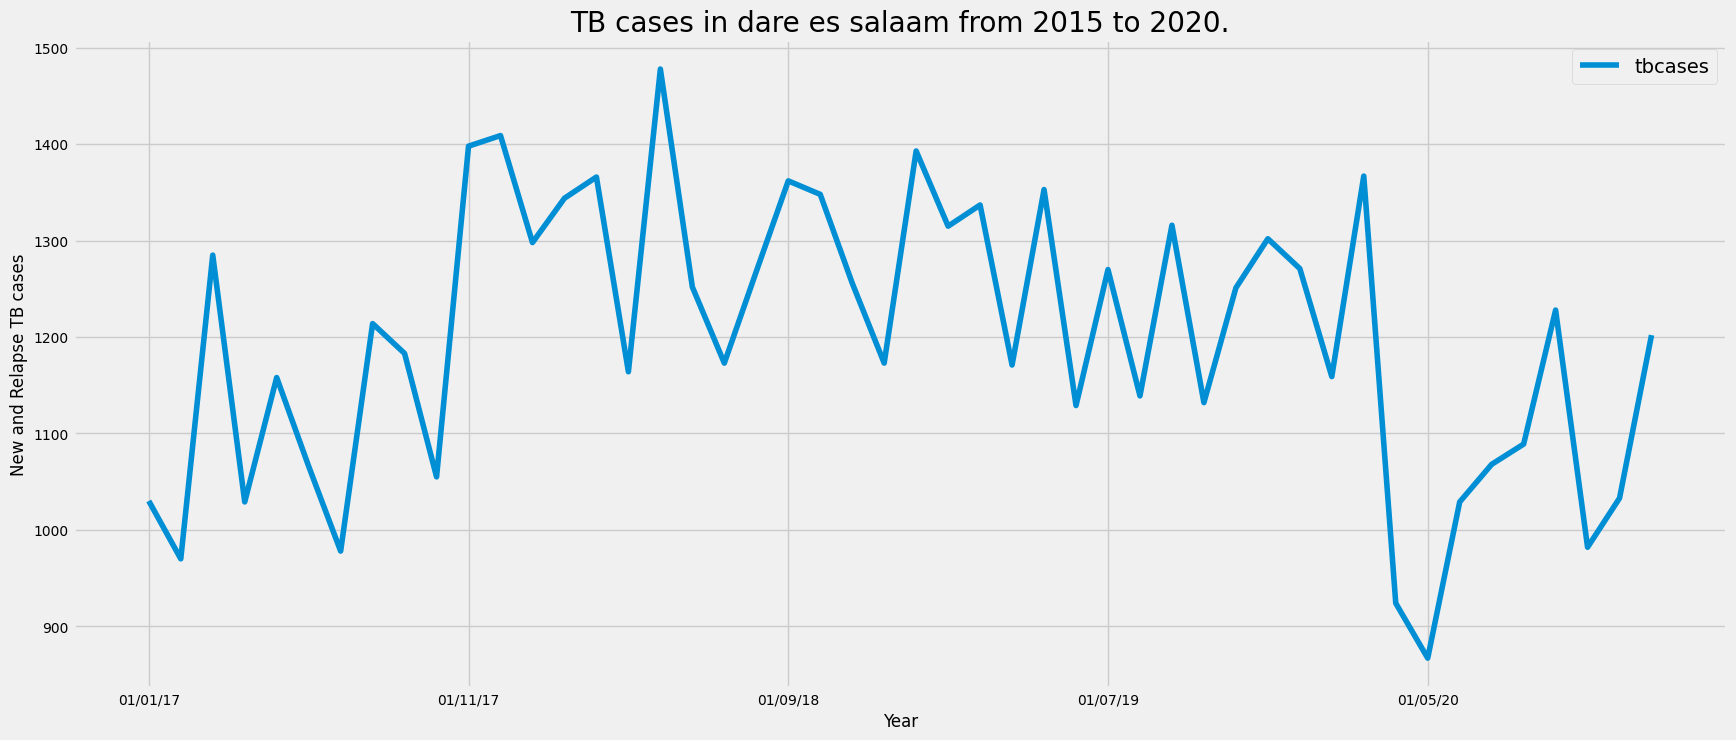

In [170]:
series.plot(figsize = (19, 8),title="TB cases in dare es salaam from 2015 to 2020.",ylabel="New and Relapse TB cases",xlabel="Year")
plt.show()

In [171]:
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
dataset = series.values
dataset = dataset.astype('float32')

In [172]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)




In [173]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
testX.shape

In [ ]:
trainX.shape

CREATE MODEL AND FITS

In [174]:
batch_size = 1
model = Sequential()
model.add(LSTM(5, batch_input_shape=(batch_size, look_back, 1), stateful=True,return_sequences=True))
model.add(LSTM(5, batch_input_shape=(batch_size, look_back, 1), stateful=True))
#model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(40):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

30/30 - 2s - loss: 0.2037
30/30 - 0s - loss: 0.0685
30/30 - 0s - loss: 0.0417
30/30 - 0s - loss: 0.0397
30/30 - 0s - loss: 0.0395
30/30 - 0s - loss: 0.0393
30/30 - 0s - loss: 0.0391
30/30 - 0s - loss: 0.0390
30/30 - 0s - loss: 0.0390
30/30 - 0s - loss: 0.0389
30/30 - 0s - loss: 0.0389
30/30 - 0s - loss: 0.0388
30/30 - 0s - loss: 0.0388
30/30 - 0s - loss: 0.0388
30/30 - 0s - loss: 0.0387
30/30 - 0s - loss: 0.0387
30/30 - 0s - loss: 0.0386
30/30 - 0s - loss: 0.0386
30/30 - 0s - loss: 0.0386
30/30 - 0s - loss: 0.0385
30/30 - 0s - loss: 0.0385
30/30 - 0s - loss: 0.0384
30/30 - 0s - loss: 0.0384
30/30 - 0s - loss: 0.0384
30/30 - 0s - loss: 0.0383
30/30 - 0s - loss: 0.0383
30/30 - 0s - loss: 0.0383
30/30 - 0s - loss: 0.0382
30/30 - 0s - loss: 0.0382
30/30 - 0s - loss: 0.0382
30/30 - 0s - loss: 0.0381
30/30 - 0s - loss: 0.0381
30/30 - 0s - loss: 0.0381
30/30 - 0s - loss: 0.0381
30/30 - 0s - loss: 0.0380
30/30 - 0s - loss: 0.0380
30/30 - 0s - loss: 0.0380
30/30 - 0s - loss: 0.0380
30/30 - 0s -

In [176]:
# make forecast
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)


In [177]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

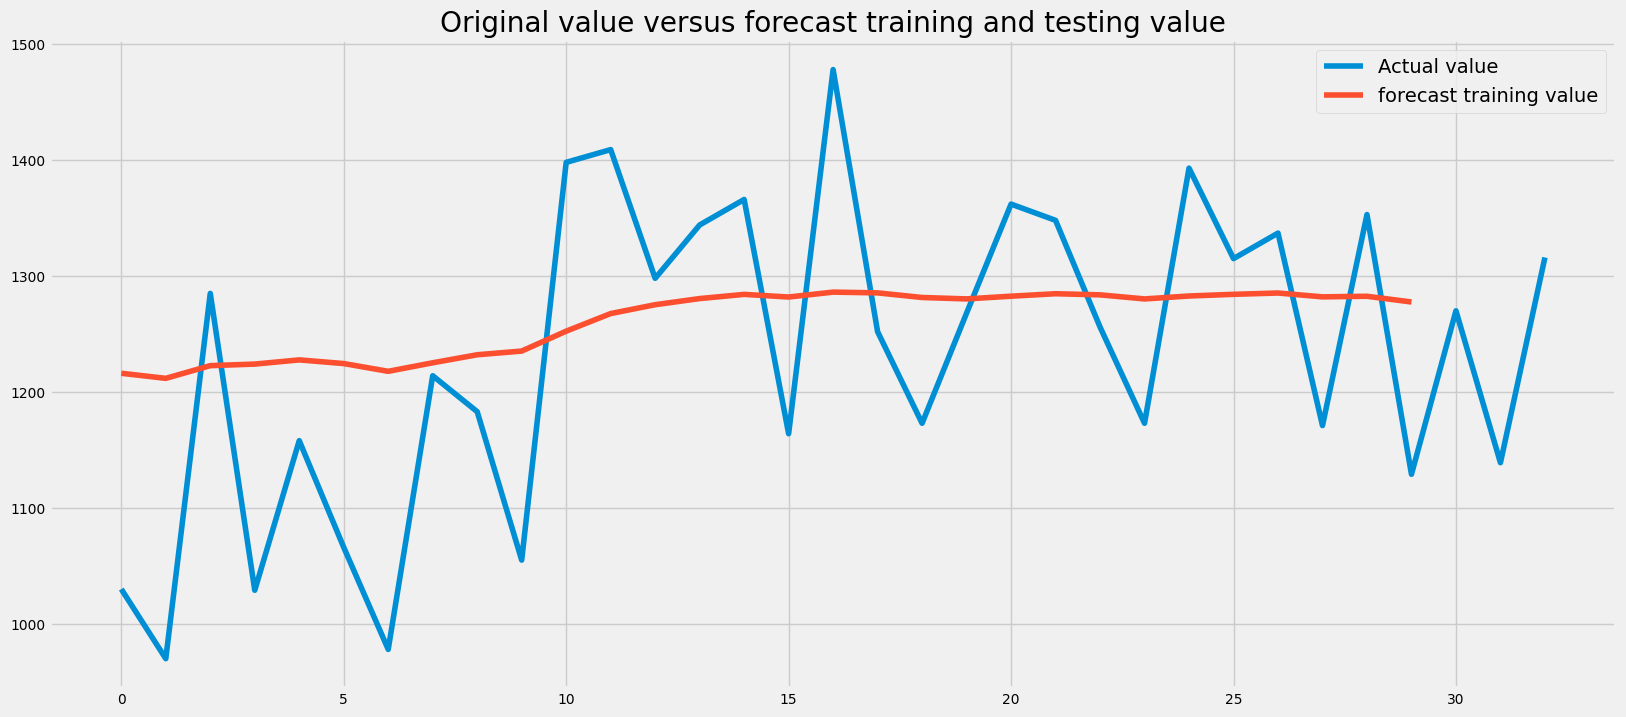

In [178]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(train),label="Actual value")
plt.plot(trainPredict,label="forecast training value")
plt.title("Original value versus forecast training and testing value")
plt.legend()
plt.show()

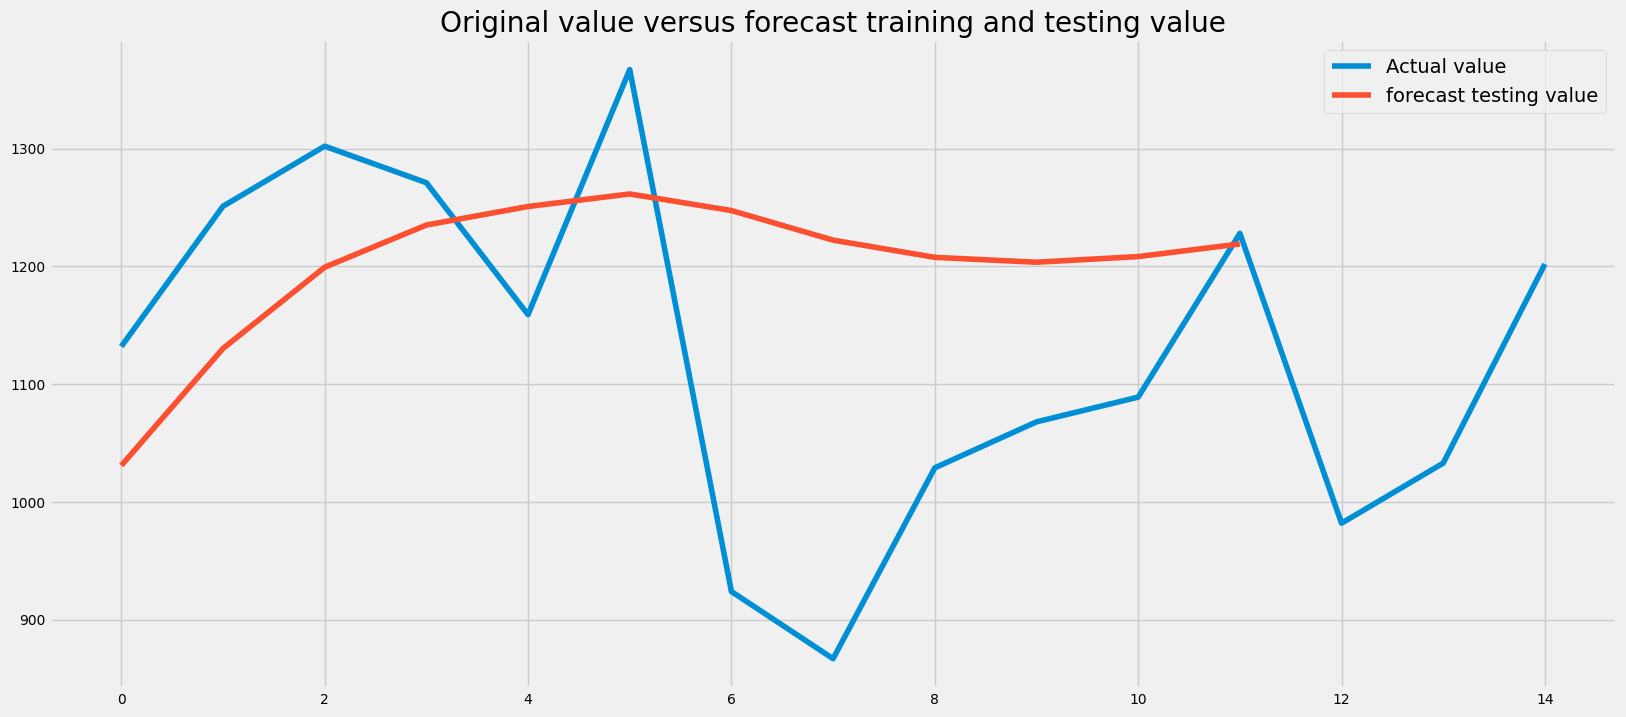

In [179]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(test),label="Actual value")
plt.plot(testPredict,label="forecast testing value")
plt.title("Original value versus forecast training and testing value")
plt.legend()
plt.show()

EVALUATE A MODEL

TESTING

In [180]:
mape = mean_absolute_percentage_error(testY[0], testPredict[:,0])  # MAPE

In [181]:
mape

0.17956826148249472

In [183]:
mse=mean_squared_error(testY[0], testPredict[:,0], squared=False)

In [184]:
mse

213.4306480582339

In [185]:
mae = mean_absolute_error(testY[0], testPredict[:,0])    # MAE   # MPE


In [186]:
mae

186.10519074277067

In [187]:
rmse = np.sqrt(mse)

In [188]:
rmse

14.60926582885786

In [ ]:
# line plot of observed vs predicted
plt.plot(testY[0],label="test value")
plt.plot(testPredict[:,0],label="predicted value")
plt.title("Original value versus forecast training and testing value")
plt.legend()
plt.show()